# Python Project 2
## By: Sue Susman, MEd, BSN, RN


In [38]:
!pip install pandas numpy matplotlib openpyxl

This code loads and displays the first few rows of each dataset to verify if they were loaded correctly.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
cost_of_living = pd.read_csv('cost_of_living.csv')
country_codes = pd.read_excel('country_codes.xlsx')
ds_salaries = pd.read_csv('ds_salaries.csv')
levels_fyi = pd.read_csv('levels_fyi_salary_data.csv')

# Explore the datasets
print("Cost of Living Dataset:")
print(cost_of_living.head())

print("\nCountry Codes Dataset:")
print(country_codes.head())

print("\nData Scientist Salaries Dataset:")
print(ds_salaries.head())

print("\nLevels FYI Dataset:")
print(levels_fyi.head())

Cost of Living Dataset:
   Rank          City State       Country  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0   NaN         Kabul   NaN   Afghanistan         NaN         NaN         NaN   
1   NaN        Tirana   NaN       Albania         NaN         NaN         NaN   
2   NaN       Algiers   NaN       Algeria         NaN         NaN         NaN   
3   NaN  Buenos Aires   NaN     Argentina         NaN         NaN         NaN   
4   NaN       Yerevan   NaN       Armenia         NaN         NaN         NaN   

   Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                 21.35        3.17                           12.83   
1                 38.68       11.33                           25.86   
2                 29.84        6.67                           18.98   
3                 35.25       10.73                           23.75   
4                 34.01       11.89                           23.64   

   Groceries Index  Restaurant Price Index  Local Purchasing P

After loading the datasets, I merged them based on the relevant columns.

In [5]:
# Merge cost_of_living with country_codes
cost_of_living = cost_of_living.merge(country_codes, on='Country', how='left')

In [6]:
print(cost_of_living.columns)

Index(['Rank', 'City', 'State', 'Country', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Alpha-2 code_x', 'Alpha-3 code_x', 'Numeric_x', 'Alpha-2 code_y',
       'Alpha-3 code_y', 'Numeric_y', 'Alpha-2 code', 'Alpha-3 code',
       'Numeric'],
      dtype='object')


In [7]:
print(ds_salaries.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [43]:
# Merge ds_salaries with cost_of_living
ds_salaries = ds_salaries.merge(cost_of_living[['Alpha-2 code', 'Cost of Living Index']], left_on='employee_residence', right_on='Alpha-2 code', how='left')

In [44]:
print(ds_salaries.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'Alpha-2 code', 'Cost of Living Index'],
      dtype='object')


Then, I calculated the normalized salary based on the cost of living index. I used the formula normalized_salary = salary / cost_of_living_index to determine the salary's purchasing power in each location.

In [45]:
# Calculate normalized salary
ds_salaries['Normalized Salary'] = ds_salaries['salary'] / ds_salaries['Cost of Living Index']

Next, I calculated the index scores for each location by normalizing the cost of living indices.

In [46]:
# Calculate index scores
cost_of_living['Normalized Cost of Living'] = cost_of_living['Cost of Living Index'] / cost_of_living['Cost of Living Index'].max()

To determine the top 5 locations for each index, I sorted the dataset based on each index column and selected the top 5 rows.

In [47]:
# Determine top 5 locations for each index
top_5_indices = {}
index_columns = ['Normalized Cost of Living', 'Groceries Index', 'Restaurant Price Index', 'Rent Index', 'Local Purchasing Power Index']

for column in index_columns:
    top_5_indices[column] = cost_of_living[['Country', column]].sort_values(by=column, ascending=False).head(5)

Finally, I can visualize the results using bar plots for each index.

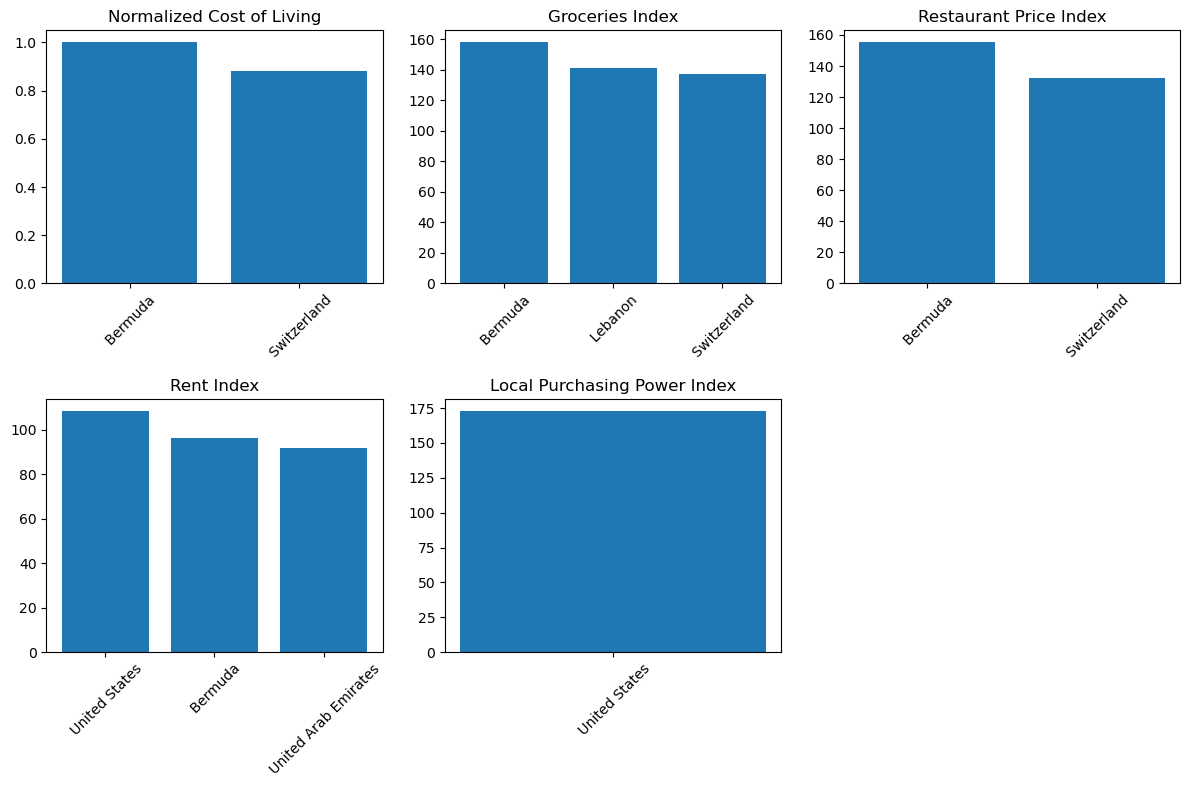

In [48]:
# Visualize the results
plt.figure(figsize=(12, 8))

for i, column in enumerate(index_columns):
    plt.subplot(2, 3, i+1)
    plt.bar(top_5_indices[column]['Country'], top_5_indices[column][column])
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The code I used above, created a figure with six subplots, each displaying a bar plot for one of the index columns. The x-axis represents the top 5 locations, and the y-axis represents the index values. This project gave me a statistical analysis with visualizations showcasing the top 5 places in the world where my data scientist salary will go the farthest with respect to each individual index within the cost_of_living.csv file.